In [1]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ANZ.csv') #storing data into dataframe df
df.head() #display first 5 records

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
#amount statistics
median_amt = df['amount'].dropna().median()
mean_amt = df['amount'].dropna().mean()
max_amt = df['amount'].dropna().max()
min_amt = df['amount'].dropna().min()

print("Total number of transactions is ",str(df.status.count()))
print('The median amount is ',str(median_amt))
print('The mean amount is ',str(mean_amt))
print('The maximum transaction amount is ',str(max_amt))
print('The minimum transaction amount is ',str(min_amt))

Total number of transactions is  12043
The median amount is  29.0
The mean amount is  187.93358797641767
The maximum transaction amount is  8835.98
The minimum transaction amount is  0.1


In [4]:
df.columns #column names

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
#age statistics
median_age = df['age'].dropna().median()
mean_age = df['age'].dropna().mean()
oldest_age = df['age'].dropna().max()
youngest_age = df['age'].dropna().min()

print('The median age is ',str(median_age))
print('The mean age is ',str(mean_age))
print('The oldest person''s age is ',str(oldest_age))
print('The youngest person''s age is ',str(youngest_age))

The median age is  28.0
The mean age is  30.5823299842232
The oldest persons age is  78
The youngest persons age is  18


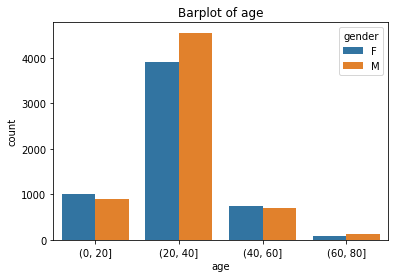

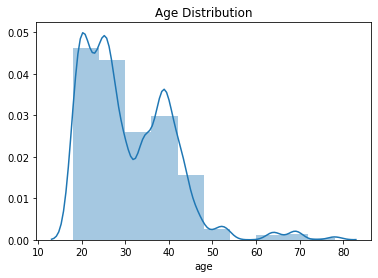

In [6]:
#age
age_cat = pd.cut(df['age'], [0,20,40,60,80]) #converting continuous values into discrete age groups
sns.countplot(x = age_cat, hue = 'gender', data = df)
plt.title('Barplot of age')
plt.show()

sns.distplot(df['age'], bins = 10, kde = True).set_title('Age Distribution')
plt.show()

6285 males and 5758 females


C:\Users\sujay\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


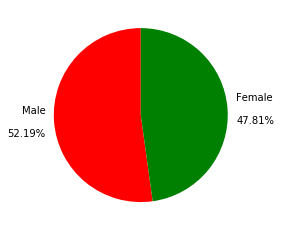

In [7]:
#gender pie plot
M = df['gender'].loc[df['gender']=='M'].value_counts() #number of males
F = df['gender'].loc[df['gender']=='F'].value_counts() #number of females
val = [M,F]

#extracting value from single record series respectively
m = M[0]
f = F[0]

print(str(m)+' males and '+str(f)+' females')

#computing percentages
mp = (m/(m+f)*100) #male percentage
mp = round(mp,2) #round off to 2 decimal places
fp = 100 - mp #female percentage

name = ['Male\n\n'+str(mp)+'%','Female\n\n'+str(fp)+'%']
colors = ['r','g']

plt.pie(val, labels = name, colors = colors, startangle = 90)
plt.show()

C:\Users\sujay\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


883 credic types and 11160 debit types


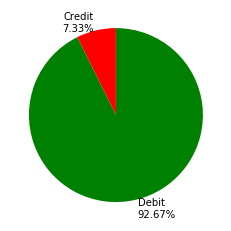

In [8]:
#movement pie plot
C = df['movement'].loc[df['movement']=='credit'].value_counts() #number of credit transactions
D = df['movement'].loc[df['movement']=='debit'].value_counts() #number of debit transactions
val = [C,D]

#extracting value from single record series respectively
c = C[0]
d = D[0]

print(str(c)+' credic types and '+str(d)+' debit types')

#computing percentages
cp = (c/(c+d)*100)
cp = round(cp, 2)
dp = 100 - cp

name = ['Credit\n'+str(cp)+'%','Debit\n'+str(dp)+'%']
colors = ['r','g']


plt.pie(val, labels = name, colors = colors, startangle=90)
plt.show()

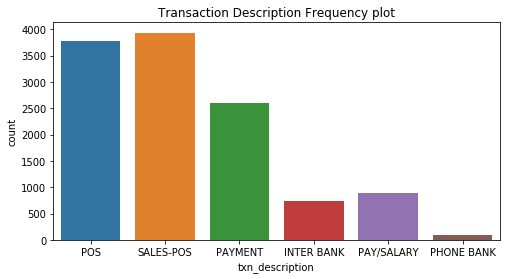

In [9]:
plt.figure(figsize = (8,4))
plt.title('Transaction Description Frequency plot')
sns.countplot(x='txn_description', data = df)

In [10]:
df['currency'].unique()

array(['AUD'], dtype=object)

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

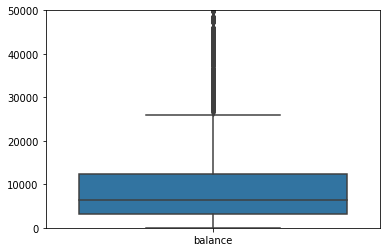

In [11]:
#boxplot of balance
sns.boxplot(data=df.loc[:,['balance']])
plt.ylim(0,50000) #to avoid excessive outliers 

df['balance'].describe() #statistics of balance

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

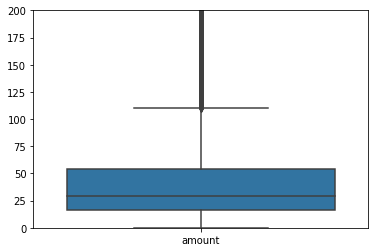

In [12]:
#boxplot of amount
sns.boxplot(data=df.loc[:,['amount']])
plt.ylim(0,200)#to avoid excessive outliers 

df['amount'].describe() #statistics of amount

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

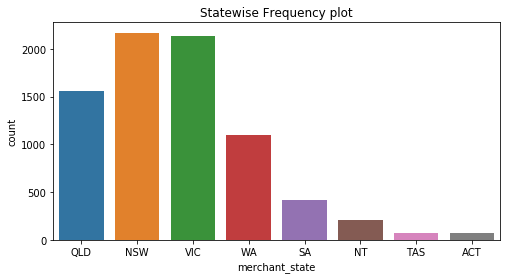

In [13]:
plt.figure(figsize = (8,4))
plt.title('Statewise Frequency plot')
sns.countplot(x='merchant_state', data = df)

df.merchant_state.value_counts()

In [14]:
#converting type
df['date'] = df['date'].astype('datetime64')

In [15]:
pd.DatetimeIndex(df['date']).year.unique()

Int64Index([2018], dtype='int64', name='date')

In [16]:
#extracting month feature from the date column into a new column
df['month'] = pd.DatetimeIndex(df['date']).month

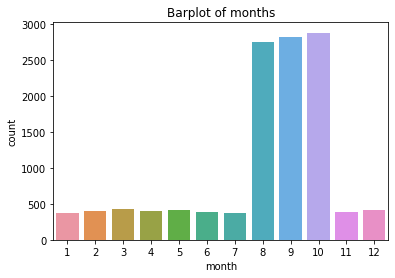

10    2885
9     2823
8     2750
3      426
5      417
12     412
2      405
4      402
11     394
6      381
1      377
7      371
Name: month, dtype: int64

In [17]:
sns.countplot(x = 'month', data = df)
plt.title('Barplot of months')
plt.show()

df.month.value_counts()

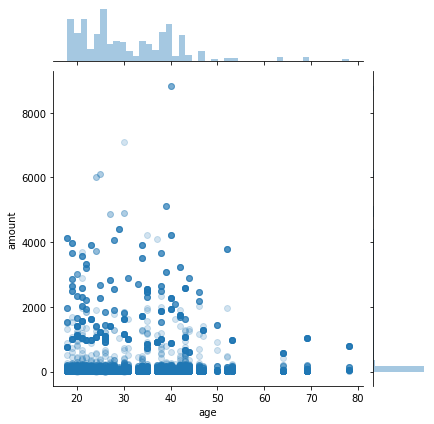

In [18]:
# jointplot gives us multivariate plot with frequency bars
#age vs amount
sns.jointplot(x=df["age"], y=df["amount"], kind='scatter', alpha = 0.2)

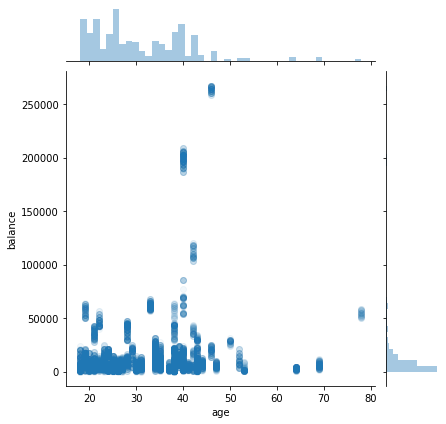

In [19]:
#age vs balance
sns.jointplot(x=df["age"], y=df["balance"], kind='scatter', alpha = 0.05)

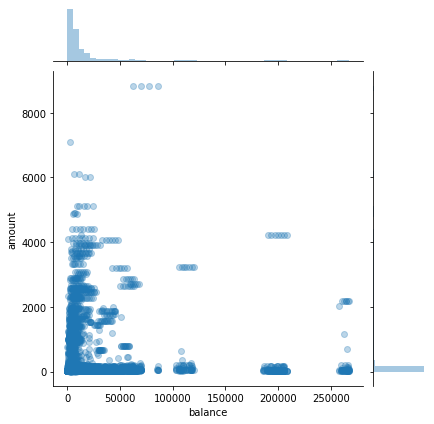

In [20]:
#balance vs amount
sns.jointplot(x=df["balance"], y=df["amount"], kind='scatter', alpha = 0.3)